<a href="https://colab.research.google.com/github/raoshailesh/loginpage/blob/main/white_wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


# reading the file winequality-red.csv

wineQuality_red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', sep=';')
print(wineQuality_red.shape)

(1599, 12)


In [ ]:
# reading the file winequality-white.csv

wineQuality_white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv', sep=';')
print(wineQuality_white.shape)

(4898, 12)


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(wineQuality_red)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

In [ ]:
wineQuality_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wineQuality_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


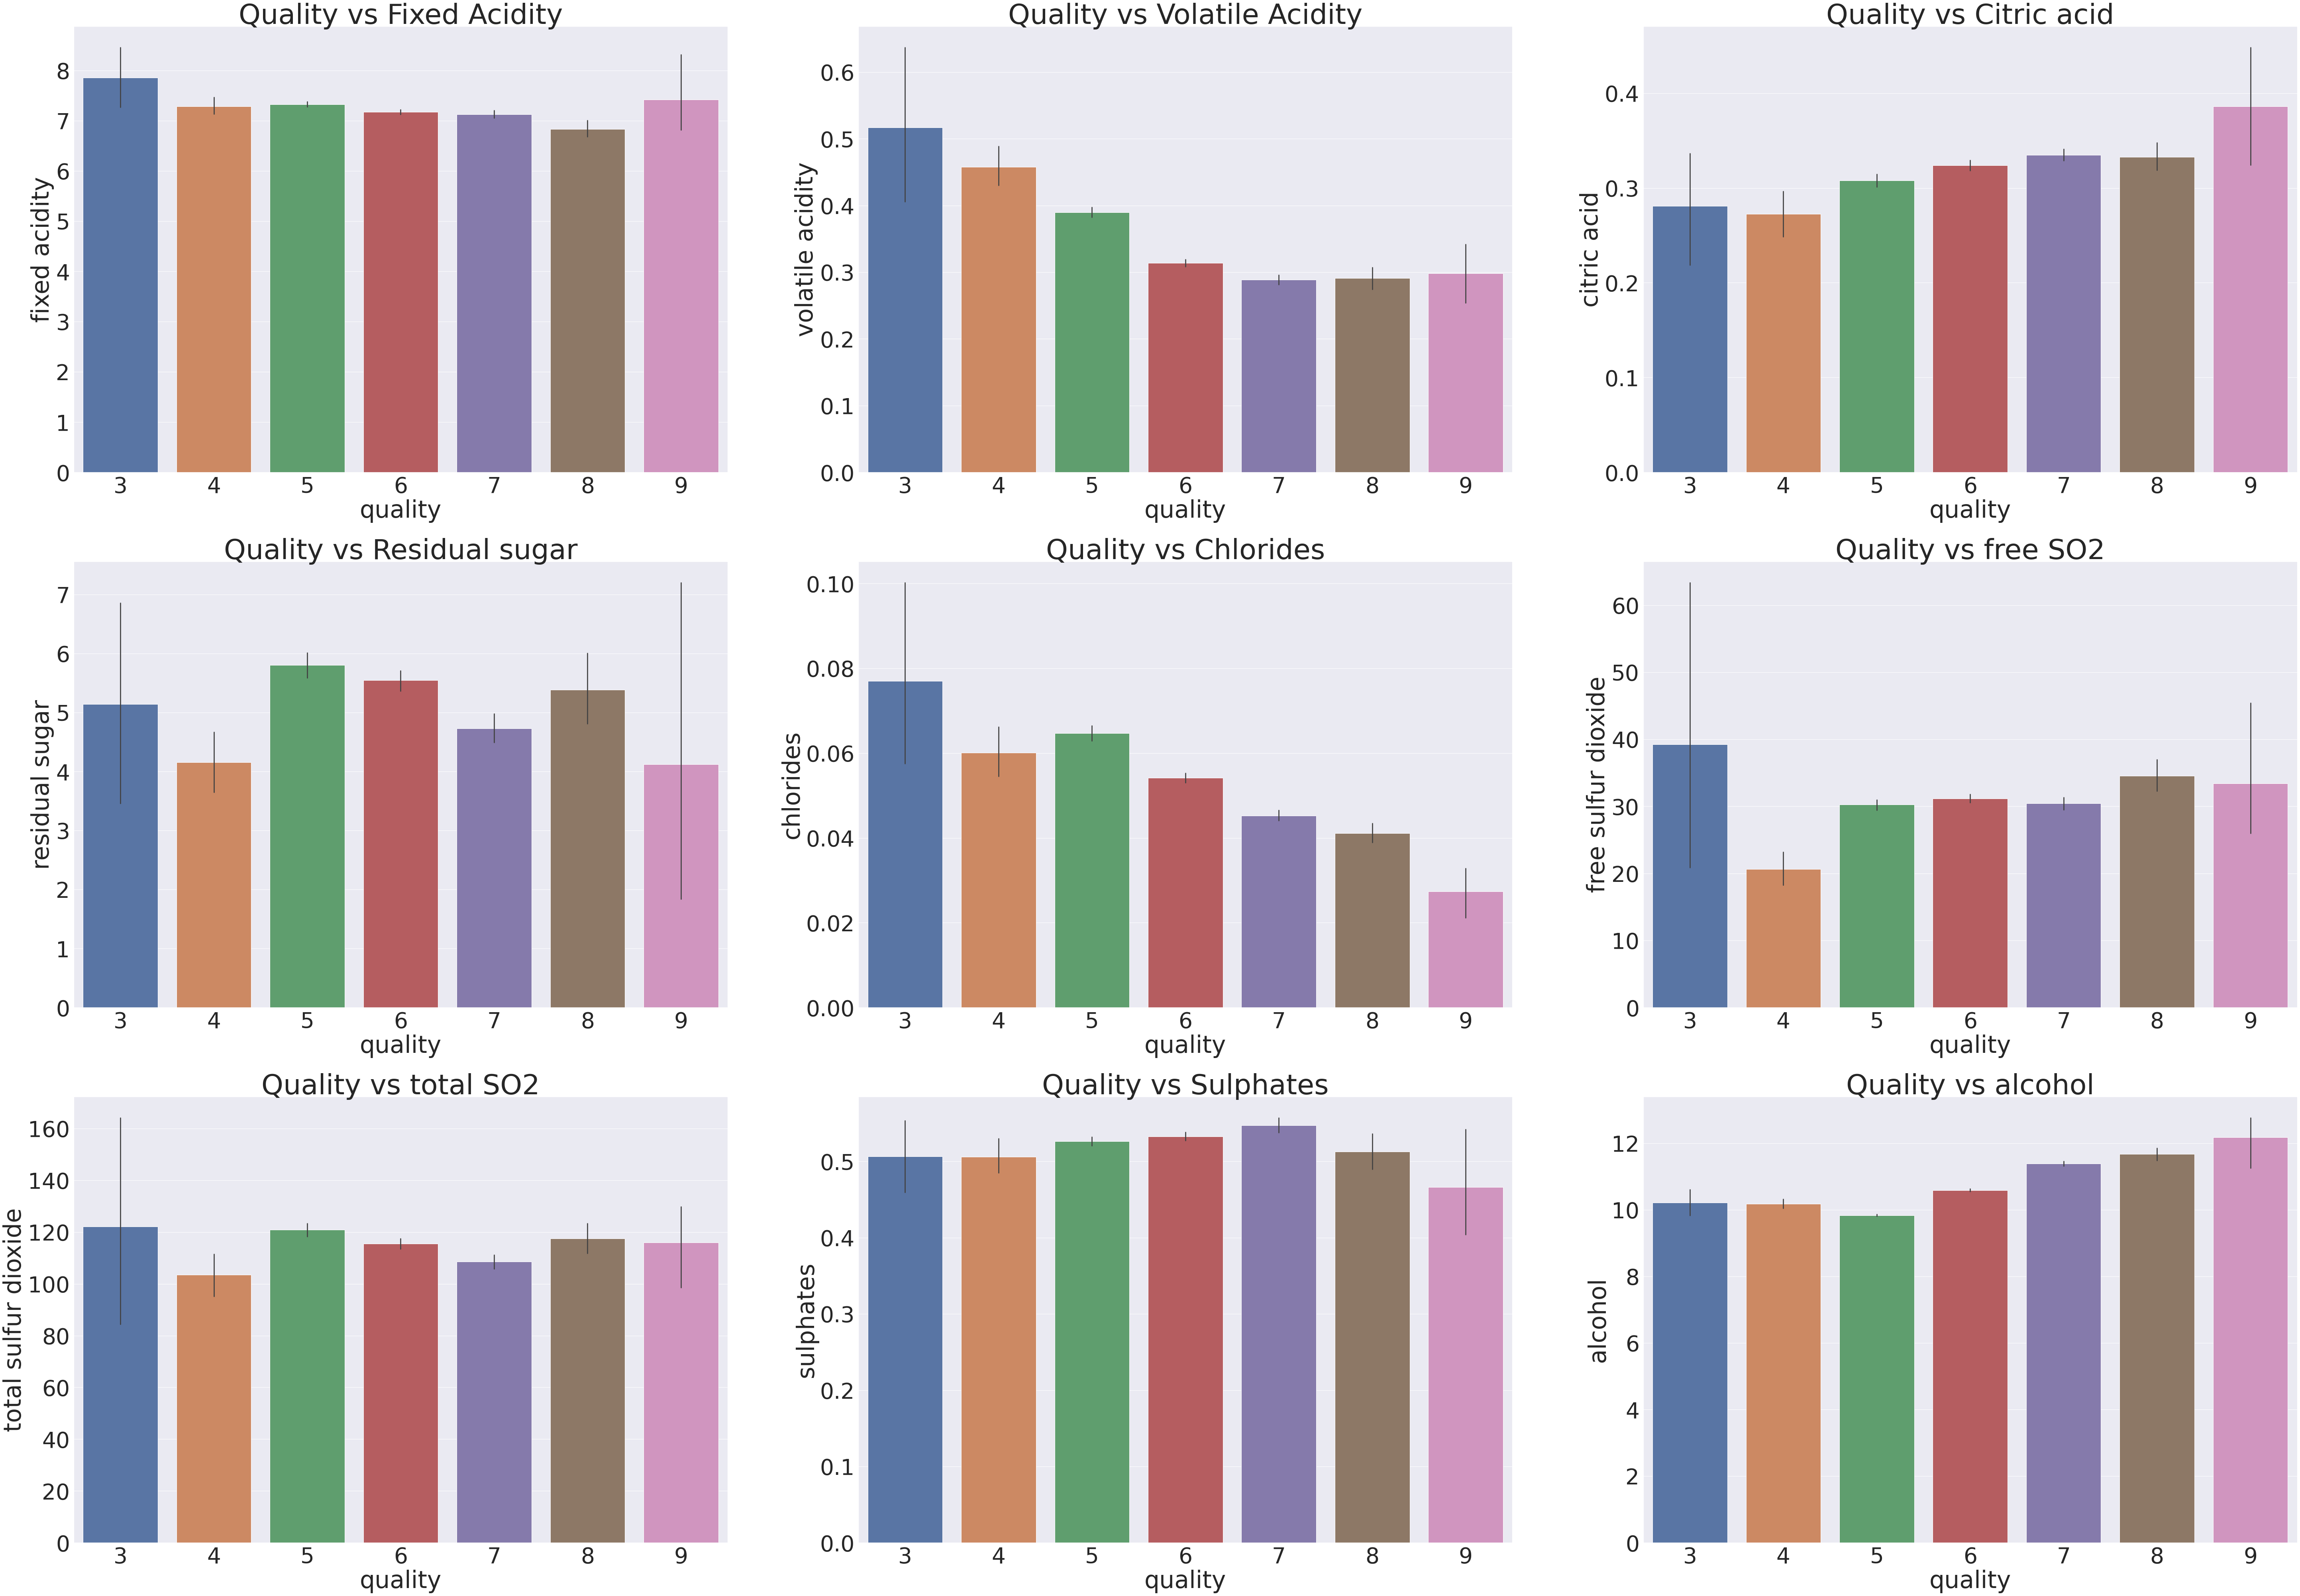

In [ ]:
frames = [wineQuality_red, wineQuality_white]
  
result = pd.concat(frames, ignore_index=True)
df = result.copy()

plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [ ]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
df = wineQuality_white
print(df['quality'].value_counts())

print(df)

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64
      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
samples = scaling.fit_transform(df[df.columns])
dataframe = pd.DataFrame(samples)

print(df.columns.values)


['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


✅**Multiclass classification using logistic regression**


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3428, 11)
(3428, 1)
(1470, 11)
(1470, 1)


In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

array([5, 6, 6, ..., 6, 6, 5])

In [ ]:
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [ ]:
import numpy as np
print(y_pred)

[5 5 6 ... 6 6 6]


In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   4   5   0   0]
 [  0   0  31  29   0   0]
 [  0   0 219 239   0   0]
 [  0   0  99 531   0   0]
 [  0   0  14 253   0   0]
 [  0   0   0  46   0   0]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8']))


Accuracy: 0.51

Micro Precision: 0.51
Micro Recall: 0.51
Micro F1-score: 0.51

Macro Precision: 0.18
Macro Recall: 0.22
Macro F1-score: 0.19

Weighted Precision: 0.39
Weighted Recall: 0.51
Weighted F1-score: 0.43

Classification Report

              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         9
     Class 4       0.00      0.00      0.00        60
     Class 5       0.60      0.48      0.53       458
     Class 6       0.48      0.84      0.61       630
     Class 7       0.00      0.00      0.00       267
     Class 8       0.00      0.00      0.00        46

    accuracy                           0.51      1470
   macro avg       0.18      0.22      0.19      1470
weighted avg       0.39      0.51      0.43      1470



**End of logisitic regression✅**

✅**One-hot-encoding**

In [ ]:
#Use get_dummies method from panda class to create dummy variable and store those in dummies
dummies = pd.get_dummies(df['quality'])
print(df['quality'])
dummies.columns=['quality_3', 'quality_4' ,'quality_5', 'quality_6', 'quality_7' ,'quality_8', 'quality_9']
print(dummies)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64
      quality_3  quality_4  quality_5  ...  quality_7  quality_8  quality_9
0             0          0          0  ...          0          0          0
1             0          0          0  ...          0          0          0
2             0          0          0  ...          0          0          0
3             0          0          0  ...          0          0          0
4             0          0          0  ...          0          0          0
...         ...        ...        ...  ...        ...        ...        ...
4893          0          0          0  ...          0          0          0
4894          0          0          1  ...          0          0          0
4895          0          0          0  ...          0          0          0
4896          0          0          0  ...          1          0          0
4897        

In [ ]:
dataframe = dataframe.drop(columns=[11])
print(dataframe)

            0         1         2   ...        8         9         10
0     0.307692  0.186275  0.216867  ...  0.254545  0.267442  0.129032
1     0.240385  0.215686  0.204819  ...  0.527273  0.313953  0.241935
2     0.413462  0.196078  0.240964  ...  0.490909  0.255814  0.338710
3     0.326923  0.147059  0.192771  ...  0.427273  0.209302  0.306452
4     0.326923  0.147059  0.192771  ...  0.427273  0.209302  0.306452
...        ...       ...       ...  ...       ...       ...       ...
4893  0.230769  0.127451  0.174699  ...  0.500000  0.325581  0.516129
4894  0.269231  0.235294  0.216867  ...  0.390909  0.279070  0.258065
4895  0.259615  0.156863  0.114458  ...  0.245455  0.279070  0.225806
4896  0.163462  0.205882  0.180723  ...  0.563636  0.186047  0.774194
4897  0.211538  0.127451  0.228916  ...  0.490909  0.116279  0.612903

[4898 rows x 11 columns]


In [ ]:
dataframe.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar'
, 'chlorides' ,'free sulfur dioxide' ,'total sulfur dioxide' ,'density' ,'pH'
 ,'sulphates', 'alcohol']

print(dataframe)

      fixed acidity  volatile acidity  ...  sulphates   alcohol
0          0.307692          0.186275  ...   0.267442  0.129032
1          0.240385          0.215686  ...   0.313953  0.241935
2          0.413462          0.196078  ...   0.255814  0.338710
3          0.326923          0.147059  ...   0.209302  0.306452
4          0.326923          0.147059  ...   0.209302  0.306452
...             ...               ...  ...        ...       ...
4893       0.230769          0.127451  ...   0.325581  0.516129
4894       0.269231          0.235294  ...   0.279070  0.258065
4895       0.259615          0.156863  ...   0.279070  0.225806
4896       0.163462          0.205882  ...   0.186047  0.774194
4897       0.211538          0.127451  ...   0.116279  0.612903

[4898 rows x 11 columns]


In [ ]:
final_dataframe = pd.concat([dataframe,dummies], axis=1)
print(final_dataframe)

      fixed acidity  volatile acidity  ...  quality_8  quality_9
0          0.307692          0.186275  ...          0          0
1          0.240385          0.215686  ...          0          0
2          0.413462          0.196078  ...          0          0
3          0.326923          0.147059  ...          0          0
4          0.326923          0.147059  ...          0          0
...             ...               ...  ...        ...        ...
4893       0.230769          0.127451  ...          0          0
4894       0.269231          0.235294  ...          0          0
4895       0.259615          0.156863  ...          0          0
4896       0.163462          0.205882  ...          0          0
4897       0.211538          0.127451  ...          0          0

[4898 rows x 18 columns]


✅**Analysis using SLP**

In [ ]:
import math
def hypothesis(w,dataset):
  y=w[0]
  sample =dataset
  sample = np.concatenate([[1], sample])
  y = np.multiply(w, sample)
  y = np.sum(y)
  gx = 1/(1+(math.e)**(-1*y))
  return gx

In [ ]:
def predicted_values(w, dataset):
  predicted = []
  for i in range(len(dataset)):
    predicted.append(hypothesis(w, dataset[i][:-7]))
  
  return np.array(predicted)

In [ ]:
# to calculate mean square error
def accuracy(predicted, dataset):
  correctly_predicted = 0
  # print("in accuracy class", predicted)
  # print(dataset)
  # print('--------------------------------------------')

  for i in range(len(predicted[0])):
    predicted_values=[0, 0, 0, 0, 0, 0, 0]
    for k in range(7):
      predicted_values[k]=predicted[k][i]
    index = predicted_values.index(max(predicted_values))
    # print("index ...", index)
    if dataset[i][-7 + index] == 1:
      correctly_predicted += 1
  return correctly_predicted/len(predicted[0])

In [ ]:
# to update w using stochastic gradient decendent
def update_parameter_stochastic(w, alpha, dataset):
  np.random.shuffle(dataset)
  m = len(dataset)
  for j in range(m):
    for k in range(7):
      hy = hypothesis(w[k], np.array(dataset[j][:-7]))
      w[k][0] = w[k][0] - (alpha)*(hy- dataset[:, -7+k][j])*hy*(1-hy)
      for i in range(1, 12):
        w[k][i] = w[k][i] - (alpha)*((hy- dataset[:, -7+k][j])* dataset[:, i-1][j])*hy*(1-hy)
  return w

In [ ]:
import matplotlib.pyplot as plt
def SLP(epoch, alpha, rho, w, train_dataset, validation_dataset):
  pre_accuracy = 0
  curr_accuracy = 0
  trains_accuracy=[]
  validation_accuracy = []
  for itr in range(epoch):
    predicted=[]
    for k in range(7):
      predict = predicted_values(w[k], train_dataset)
      predicted.append(predict)

    curr_accuracy = accuracy(predicted, train_dataset)
    w = update_parameter_stochastic(w, alpha, train_dataset)
    
    trains_accuracy.append(curr_accuracy)
    predicted=[]
    for k in range(len(w)):
      predict = predicted_values(w[k], validation_dataset)
      predicted.append(predict)
    validation_accuracy.append(accuracy(predicted, validation_dataset))

    if abs(curr_accuracy - pre_accuracy) <= rho:
      break;
    pre_accuracy = curr_accuracy
  epochs = [i for i in range(len(validation_accuracy))]
  # fig, ax = plt.subplots()
  # ax.plot(epochs, trains_accuracy)
  # ax.plot(epochs, validation_accuracy)
  return w, curr_accuracy, validation_accuracy[-1]

In [ ]:
train_datasets = final_dataframe.sample(frac=0.3)
dataframe = final_dataframe.drop(train_datasets.index)
validation_dataset = dataframe.sample(frac=(.1/.7))
test_dataset = dataframe.drop(validation_dataset.index)

In [ ]:
alpha = [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epoch = 50
p = 0.0003
for al in alpha:
  w=[[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1]]
  w, trains_accuracy, validation_accuracy = SLP(epoch, al, p, w, train_datasets.to_numpy(), validation_dataset.to_numpy())
  predicted=[]
  for k in range(len(w)):
    predict = predicted_values(w[k], test_dataset.to_numpy())
    predicted.append(predict)
  test_accuracy = accuracy(predicted, test_dataset.to_numpy())
  print("\n\n\nFor Alpha : ", al)
  print("Train Accuracy : ",trains_accuracy , "\nValidation MSE : ", validation_accuracy, "\nTest accuracy : ", test_accuracy)




For Alpha :  0.1
Train Accuracy :  0.5139550714771953 
Validation MSE :  0.5510204081632653 
Test accuracy :  0.5185437223545424



For Alpha :  0.2
Train Accuracy :  0.5418652144315861 
Validation MSE :  0.5612244897959183 
Test accuracy :  0.5216059884314392



For Alpha :  0.3
Train Accuracy :  0.5445881552076243 
Validation MSE :  0.573469387755102 
Test accuracy :  0.5212657366451174



For Alpha :  0.5
Train Accuracy :  0.5200816882232812 
Validation MSE :  0.5673469387755102 
Test accuracy :  0.5209254848587955



For Alpha :  0.6
Train Accuracy :  0.5214431586113002 
Validation MSE :  0.5408163265306123 
Test accuracy :  0.5253487580809799



For Alpha :  0.7
Train Accuracy :  0.5302927161334241 
Validation MSE :  0.5081632653061224 
Test accuracy :  0.5093569241238517



For Alpha :  0.8
Train Accuracy :  0.5214431586113002 
Validation MSE :  0.48775510204081635 
Test accuracy :  0.43892480435522285



For Alpha :  0.9
Train Accuracy :  0.494213750850919 
Validation MSE :  

**✅Preparing dataset to final checking of SLP**

In [ ]:
tr_dataframe = pd.concat([X_train, y_train], axis = 1)
te_dataframe = pd.concat([X_test, y_test], axis = 1)
print(tr_dataframe)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
196             6.4              0.29         0.44  ...       0.38      9.1        5
4552            6.4              0.55         0.26  ...       0.73     13.1        6
133             6.6              0.24         0.27  ...       0.51      9.2        5
2517            7.3              0.51         0.29  ...       0.56      9.5        6
3034            6.9              0.25         0.47  ...       0.55      9.4        6
...             ...               ...          ...  ...        ...      ...      ...
4859            6.0              0.43         0.34  ...       0.37     11.0        6
3264            5.9              0.24         0.12  ...       0.44      9.6        6
1653            7.9              0.33         0.28  ...       0.38      8.8        6
2607            8.9              0.26         0.33  ...       0.46     10.8        6
2732            7.9              0.51         0.34  ...       0.5

In [ ]:

samples1 = scaling.fit_transform(tr_dataframe[tr_dataframe.columns])
train_dataframe = pd.DataFrame(samples1)
train_dataframe.columns = tr_dataframe.columns

samples2 = scaling.fit_transform(te_dataframe[te_dataframe.columns])
test_dataframe = pd.DataFrame(samples2)
test_dataframe.columns = te_dataframe.columns

In [ ]:
train_dummies = pd.get_dummies(train_dataframe['quality'])
train_dummies.columns=['quality_3', 'quality_4' ,'quality_5', 'quality_6', 'quality_7' ,'quality_8', 'quality_9']
print(train_dummies)

      quality_3  quality_4  quality_5  ...  quality_7  quality_8  quality_9
0             0          0          1  ...          0          0          0
1             0          0          0  ...          0          0          0
2             0          0          1  ...          0          0          0
3             0          0          0  ...          0          0          0
4             0          0          0  ...          0          0          0
...         ...        ...        ...  ...        ...        ...        ...
3423          0          0          0  ...          0          0          0
3424          0          0          0  ...          0          0          0
3425          0          0          0  ...          0          0          0
3426          0          0          0  ...          0          0          0
3427          0          0          1  ...          0          0          0

[3428 rows x 7 columns]


In [ ]:
train_dataframe = pd.concat([train_dataframe.iloc[:, :-1],train_dummies], axis=1)
print(train_dataframe)

      fixed acidity  volatile acidity  ...  quality_8  quality_9
0            0.3250          0.205882  ...          0          0
1            0.3250          0.460784  ...          0          0
2            0.3500          0.156863  ...          0          0
3            0.4375          0.421569  ...          0          0
4            0.3875          0.166667  ...          0          0
...             ...               ...  ...        ...        ...
3423         0.2750          0.343137  ...          0          0
3424         0.2625          0.156863  ...          0          0
3425         0.5125          0.245098  ...          0          0
3426         0.6375          0.176471  ...          0          0
3427         0.5125          0.421569  ...          0          0

[3428 rows x 18 columns]


In [ ]:
test_dummies = pd.get_dummies(test_dataframe['quality'])
test_dummies.columns=['quality_3', 'quality_4' ,'quality_5', 'quality_6', 'quality_7' ,'quality_8']

test_dummies['quality_9'] = [0 for _ in range(1470)]
print(test_dummies)

      quality_3  quality_4  quality_5  ...  quality_7  quality_8  quality_9
0             0          0          1  ...          0          0          0
1             0          0          0  ...          0          0          0
2             0          0          0  ...          1          0          0
3             0          0          0  ...          0          1          0
4             0          0          1  ...          0          0          0
...         ...        ...        ...  ...        ...        ...        ...
1465          0          0          1  ...          0          0          0
1466          0          0          0  ...          0          1          0
1467          0          0          0  ...          0          0          0
1468          0          0          0  ...          0          0          0
1469          0          0          0  ...          0          0          0

[1470 rows x 7 columns]


In [ ]:
test_dataframe = pd.concat([test_dataframe.iloc[:, :-1],test_dummies], axis=1)
print(test_dataframe)

      fixed acidity  volatile acidity  ...  quality_8  quality_9
0              0.31          0.259459  ...          0          0
1              0.28          0.248649  ...          0          0
2              0.34          0.064865  ...          0          0
3              0.08          0.227027  ...          1          0
4              0.18          0.216216  ...          0          0
...             ...               ...  ...        ...        ...
1465           0.20          0.216216  ...          0          0
1466           0.13          0.075676  ...          1          0
1467           0.18          0.129730  ...          0          0
1468           0.19          0.162162  ...          0          0
1469           0.27          0.540541  ...          0          0

[1470 rows x 18 columns]


In [ ]:
w=[[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1]]
w, trains_accuracy, validation_accuracy = SLP(epoch, 0.5, p, w, train_dataframe.to_numpy(), test_dataframe.to_numpy())
predicted=[]
for k in range(len(w)):
  predict = predicted_values(w[k], test_dataframe.to_numpy())
  predicted.append(predict)

print(predicted)

[array([0.00300543, 0.00415025, 0.00392187, ..., 0.0043622 , 0.00509342,
       0.00249019]), array([0.0317769 , 0.01851098, 0.00540613, ..., 0.00848348, 0.00263665,
       0.02010526]), array([0.23520302, 0.26938141, 0.07590256, ..., 0.03517218, 0.06904535,
       0.19979021]), array([0.33602042, 0.39090598, 0.54305675, ..., 0.54909766, 0.55051727,
       0.17619587]), array([0.14475181, 0.10443666, 0.26282366, ..., 0.56056862, 0.43668796,
       0.334221  ]), array([0.0329348 , 0.02508063, 0.07616743, ..., 0.11301953, 0.10608413,
       0.16323916]), array([0.00199959, 0.00265341, 0.00273797, ..., 0.00321642, 0.0032994 ,
       0.00157533])]


In [ ]:
print(len(predicted[0]))

1470


In [ ]:
# to calculate mean square error
def predict(predicted):
  y_pred = []
  for i in range(len(predicted[0])):
    predicted_values=[0, 0, 0, 0, 0, 0, 0]
    for k in range(7):
      predicted_values[k]=predicted[k][i]
    index = predicted_values.index(max(predicted_values))
    y_pred.append(3 + index)
  return y_pred

In [ ]:
test_pred = predict(predicted)

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, test_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, test_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, test_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, test_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, test_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, test_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, test_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, test_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, test_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, test_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, test_pred, target_names=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8']))


Accuracy: 0.45

Micro Precision: 0.45
Micro Recall: 0.45
Micro F1-score: 0.45

Macro Precision: 0.41
Macro Recall: 0.24
Macro F1-score: 0.22

Weighted Precision: 0.50
Weighted Recall: 0.45
Weighted F1-score: 0.41

Classification Report

              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         9
     Class 4       1.00      0.02      0.03        60
     Class 5       0.62      0.20      0.30       458
     Class 6       0.46      0.67      0.54       630
     Class 7       0.37      0.55      0.44       267
     Class 8       0.00      0.00      0.00        46

    accuracy                           0.45      1470
   macro avg       0.41      0.24      0.22      1470
weighted avg       0.50      0.45      0.41      1470



✅**SLP using inbuilt**

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
n_itr = 40
alpha = 0.1


sc = StandardScaler()
sc.fit(X_train)
_X_train = sc.transform(X_train)
_X_test = sc.transform(X_test)

slp = Perceptron()

slp.fit(_X_train, y_train)

y_pred=slp.predict(_X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.3952380952380952


✅**multilayer perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(600)).fit(_X_train, y_train)

In [ ]:
clf.score(_X_test, y_test)
__y_pred = clf.predict(_X_test)

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_MLP = confusion_matrix(y_test, __y_pred)
print(cm_MLP)

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, __y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, __y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, __y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, __y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, __y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, __y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, __y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, __y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, __y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, __y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, __y_pred, target_names=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8']))

✅**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_clf = LogisticRegression(random_state=0).fit(_X_train, y_train)
logistic_clf.score(_X_test, y_test)

_y_pred = logistic_clf.predict(_X_test)

In [ ]:
cm_lg = confusion_matrix(y_test, _y_pred)
print(cm_lg)

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, _y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, _y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, _y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, _y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, _y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, _y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, _y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, _y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, _y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, _y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, _y_pred, target_names=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class_9']))